In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set(style="whitegrid")

In [136]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [137]:
data = pd.read_csv("/content/UCI_Credit_Card.csv")

In [138]:
data_to_clean = data.copy()
data_without_id = data_to_clean.drop('ID', axis=1)

In [139]:
data_without_id.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [140]:
data_to_clean.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# **Taking a look at:**

1. How many people defaults overall?
2. what is the proportion of education to defauting
3. Age group of defaulters
4. Will be interesting to see if people started defaulting when they clocked retirement?


According to ChatGPT, Bill Statement is a document that provides a summary of financial transactions between two parties over a specific period. It is commonly associated with various types of accounts, such as credit cards, utility services, subscriptions, or loans. **The purpose of a bill statement is to inform the recipient of the charges, payments, and other relevant details related to the account**.


In [141]:
# data_to_clean.isnull().sum() # No null data

In [142]:
# Renamed the predictor column

data_to_clean.rename(columns={'default.payment.next.month':'_default'}, inplace=True)


# **Feature Engineering**

In [143]:
# data_to_clean.columns
columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       '_default']

In [144]:
data_to_clean['total_bill'] = data_to_clean.iloc[:,11:17].sum(axis=1)
data_to_clean['total_payment'] = data_to_clean.iloc[:,17:23].sum(axis=1)

'''
Credit utilization ratio is the ratio of credit used to the total credit available.
A good credit utilization ratio is such that is kept under 30%.
Credit utilization ratio above 30% is usually considered as
'''

data_to_clean['Credit_util_ratio'] = (data_to_clean['total_bill']-data_to_clean['total_payment'])/data_to_clean['LIMIT_BAL']*100
# data_to_clean

In [145]:

age_bin = [0, 16, 25, 35, 64, 100]
_group = ['0-15', '16-24', '25-34','35-64', '65+']

data_to_clean['age_group'] = pd.cut(data_to_clean['AGE'], bins=age_bin, labels=_group, right=False)
data_to_clean['age_group'] = pd.Categorical(data_to_clean['age_group'], categories=_group)

# **EDA**

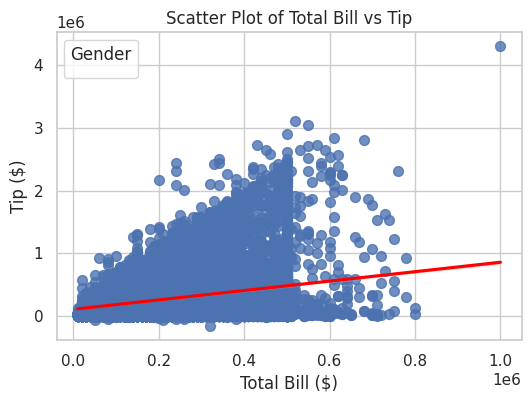

In [146]:
plt.figure(figsize=(6, 4))

sns.regplot(x='LIMIT_BAL', y='total_bill', data=data_to_clean, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Set labels and title
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.title('Scatter Plot of Total Bill vs Tip')

# Show the legend
plt.legend(title='Gender')

<ipython-input-147-e78fac592301>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='total_bill', data=data_to_clean, ci=None)


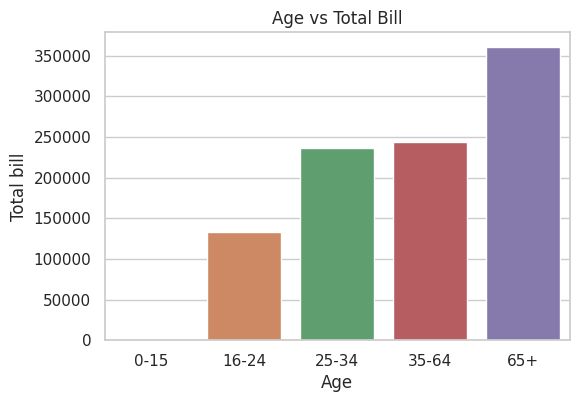

In [147]:
plt.figure(figsize=(6, 4))
sns.barplot(x='age_group', y='total_bill', data=data_to_clean, ci=None)
plt.title('Age vs Total Bill')
plt.xlabel('Age')
plt.ylabel('Total bill')
plt.show()

In [148]:
categorical_features = ['ID', 'SEX', 'EDUCATION', 'MARRIAGE','LIMIT_BAL', 'total_bill', 'total_payment']

sex_map = {1:"male", 2:"female"}
edu_map = {1:'graduate school', 2:'university', 3:'high school', 4:'others', 5:'unknown', 6:'unknown'}
mage_map = {1:'married', 2:'single',3:'others'}

categorical_data = data_to_clean[categorical_features]

categorical_data['SEX'].replace(sex_map, inplace=True)
categorical_data['EDUCATION'].replace(edu_map, inplace=True)
categorical_data['MARRIAGE'].replace(mage_map, inplace=True)


<ipython-input-148-1eab4edd311a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['SEX'].replace(sex_map, inplace=True)
<ipython-input-148-1eab4edd311a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['EDUCATION'].replace(edu_map, inplace=True)
<ipython-input-148-1eab4edd311a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data['MARRIAGE'].replace(mage_map, inplace=True)


<ipython-input-149-47dc542577a8>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='EDUCATION', y='total_bill', data=categorical_data, ci=None)


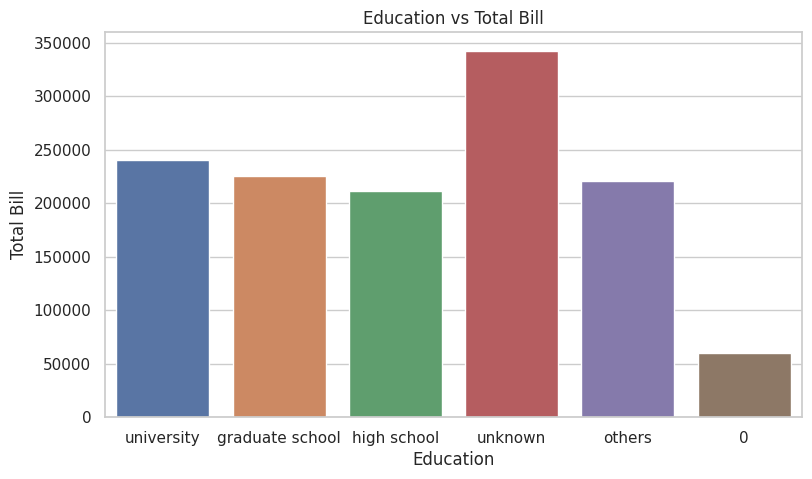

In [149]:
plt.figure(figsize=(9, 5))
sns.barplot(x='EDUCATION', y='total_bill', data=categorical_data, ci=None)
plt.title('Education vs Total Bill')
plt.xlabel('Education')
plt.ylabel('Total Bill')
plt.show()

<ipython-input-150-cf83c76fd759>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='EDUCATION', y='total_payment', data=categorical_data, ci=None)


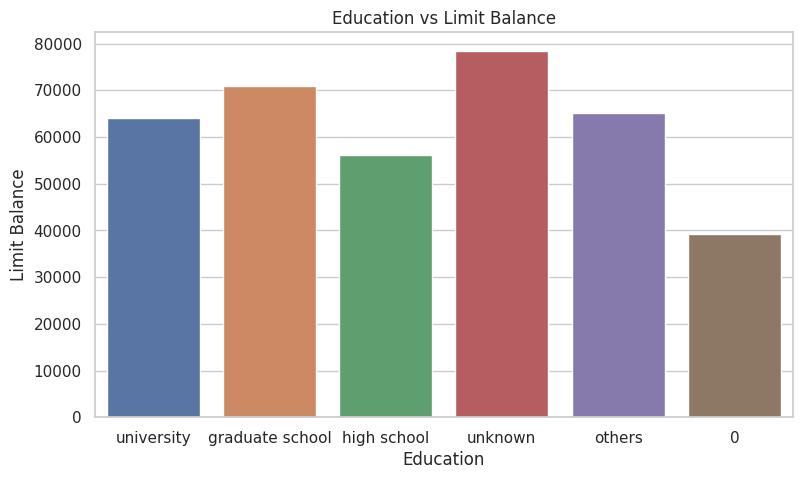

In [150]:
plt.figure(figsize=(9, 5))
sns.barplot(x='EDUCATION', y='total_payment', data=categorical_data, ci=None)
plt.title('Education vs Limit Balance')
plt.xlabel('Education')
plt.ylabel('Limit Balance')
plt.show()

<ipython-input-151-c27f822d67cb>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='MARRIAGE', y='total_payment', data=categorical_data, ci=None)


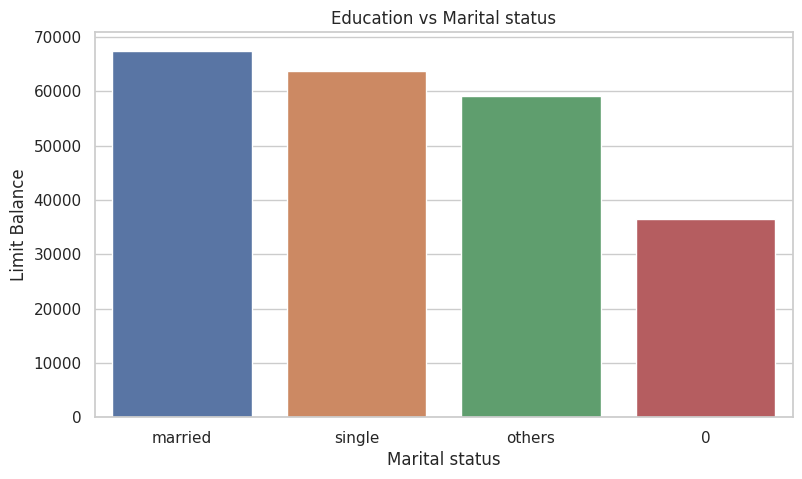

In [151]:
plt.figure(figsize=(9, 5))
sns.barplot(x='MARRIAGE', y='total_payment', data=categorical_data, ci=None)
plt.title('Education vs Marital status')
plt.xlabel('Marital status')
plt.ylabel('Limit Balance')
plt.show()

In [152]:
negative_columns = ['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
negative_data = data_to_clean[(data_to_clean[negative_columns]<0).all(axis=1)]

clean_data = data_to_clean[(data_to_clean[negative_columns]>=0).all(axis=1)]

In [153]:
clean_data_columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'total_bill', 'total_payment', 'Credit_util_ratio', '_default']

clean_data = clean_data[clean_data_columns]

In [154]:
from sklearn.model_selection import train_test_split

X = clean_data.iloc[:,:len(clean_data_columns)-1]
y = clean_data['_default']

In [155]:
clean_data['_default'].value_counts()

0    21752
1     6318
Name: _default, dtype: int64

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 40)

In [157]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(sampling_strategy =0.8, random_state=40 )
X_res,y_res=smote.fit_resample(X_train,y_train)

In [158]:
y_res.value_counts()

0    16802
1    13311
Name: _default, dtype: int64

In [159]:
X_test.shape

(5614, 26)

In [160]:
import pickle
def scaling(X_res, X_test):
  scaler = MinMaxScaler()
  scaler.fit(X_res)
  X_train_scaled = scaler.transform(X_res)
  X_test_scaled = scaler.transform(X_test)
  file = open('/content/min_max.pkl','wb')
  pickle.dump(scaler,file)
  file.close()
  return X_train_scaled, X_test_scaled

In [161]:
X_train_scaled, X_test_scaled= scaling(X_res, X_test)

In [162]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [163]:
model = XGBClassifier()
model.fit(X_train_scaled, y_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [164]:
y_pred = model.predict(X_test_scaled)

In [165]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [166]:
y_test.shape

(5614,)

In [167]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[3817,  484],
       [ 714,  599]])

In [168]:
true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]

In [169]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7866049162807267

In [170]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.887468030690537

In [171]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8424188920768042

In [172]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8643568840579711

In [173]:
print('Accuracy: ', Accuracy)
print('Precision:', Precision)
print('Recall: ', Recall)
print('F1_score: ', F1_Score)



Accuracy:  0.7866049162807267
Precision: 0.887468030690537
Recall:  0.8424188920768042
F1_score:  0.8643568840579711


In [174]:
file = open('/content/XGB_model.pkl','wb')
pickle.dump(model,file)
file.close()


# **Limitations of the dataset**

1. No information about the employment status of the customers, while age can provide insight into this, it is not wholesome.
2. No information about the country/economic situation of the country, e.g., inflation, as this is also a major factor that affects spendings of customers.

# **Outliers**

In credit risk data, a high values may not indicate the present of outlier. It may be the true representation of the customer's earning and debt profile. Therefore, all values are left intact and scaled before fed into the model.
